In [37]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [4]:
df = pd.read_csv(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S4_HR_Data_Challenge.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='salary', ylabel='left'>

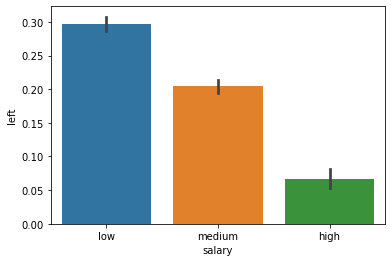

In [5]:
sns.barplot(x = 'salary', y = 'left', data = df)

<AxesSubplot:xlabel='salary'>

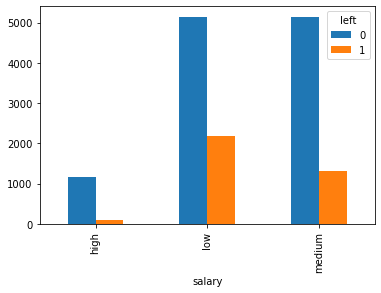

In [7]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

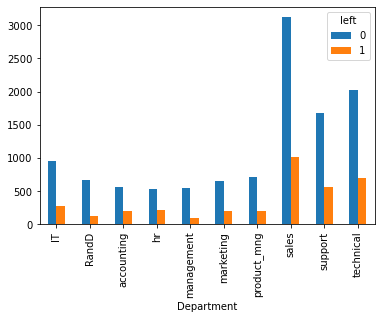

In [8]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

## T2

In [9]:
df.shape

(14999, 10)

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [15]:
df['Department']=df['Department'].astype('category')
df['salary']=df['salary'].astype('category')
print(df.head())
print(df.dtypes)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [21]:
purpose_encoder = preprocessing.LabelEncoder()

# Encoding
purpose_encoder.fit(df['Department'])
print(purpose_encoder.classes_)
df['Department'] = purpose_encoder.transform(df['Department'])

df.head()

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [20]:
purpose_encoder = preprocessing.LabelEncoder()

# Encoding
purpose_encoder.fit(df['salary'])
print(purpose_encoder.classes_)
df['salary'] = purpose_encoder.transform(df['salary'])

df.head()

['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [25]:
cor= df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


<AxesSubplot:>

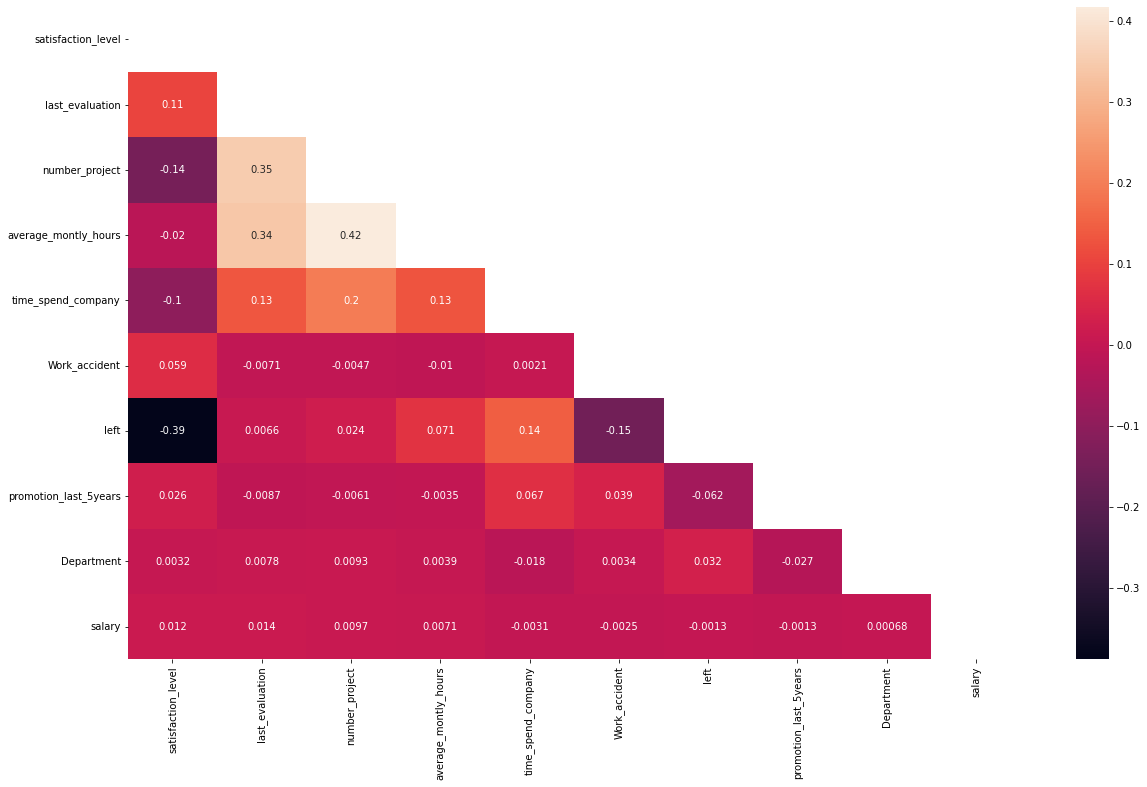

In [24]:
mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(20,12))
sns.heatmap(cor, mask=mask, annot=True)

Train test data

In [28]:
loan_train, loan_test = train_test_split(df,train_size = 0.8)

print('Size of training dataset: ', loan_train.shape)
print('Size of test dataset: ', loan_test.shape)

Size of training dataset:  (11999, 10)
Size of test dataset:  (3000, 10)


In [29]:
X_train = loan_train.drop(columns='left', axis =1)
Y_train = loan_train['left']
X_test = loan_test.drop(columns='left', axis =1)
Y_test = loan_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11999, 9), (11999,), (3000, 9))

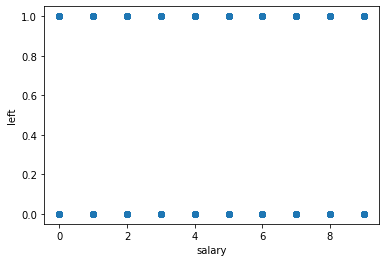

In [33]:
plt.scatter(X_test['Department'],Y_test)
plt.xlabel('salary')
plt.ylabel('left')
plt.show()

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

76.59

In [39]:
coeff_df = pd.DataFrame(loan_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,number_project,0.727790
4,Work_accident,0.206909
7,Department,0.035103
3,time_spend_company,0.004471
8,salary,-0.001494
2,average_montly_hours,-0.314346
6,promotion_last_5years,-1.039671
5,left,-1.483609
0,last_evaluation,-4.231148


In [40]:
logreg.intercept_

array([0.16047578])

In [41]:
logreg.score(X_test, Y_test)

0.767

In [42]:
np.unique(Y_pred)

array([0, 1], dtype=int64)

#### Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[2123  172]
 [ 527  178]]
2123 172 527 178


In [45]:
print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred))
print('f1-score:', f1_score(Y_test, Y_pred))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.767
recall: 0.2524822695035461
f1-score: 0.33744075829383885
precision: 0.5085714285714286


#### Roc-auc

In [46]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7919306540583135

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.589


In [48]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [49]:
ns_probs = [0 for _ in range(len(Y_test))]

In [50]:
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


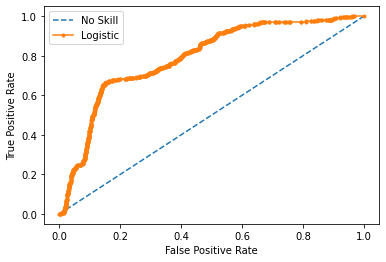

In [51]:
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Interpretation The AUC value is 79% which indicates the efficiancy of this Model which is good

### Naive Bayes

In [53]:
#split dataset in features and target variable
feature_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary']
X = df[feature_cols] # Features
y = df.left

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [60]:
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9517777777777777


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3294,  122],
       [  95,  989]], dtype=int64)

In [63]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.9517777777777777
recall: 0.9517777777777777
f1-score: 0.9519786959690447
precision: 0.8901890189018902


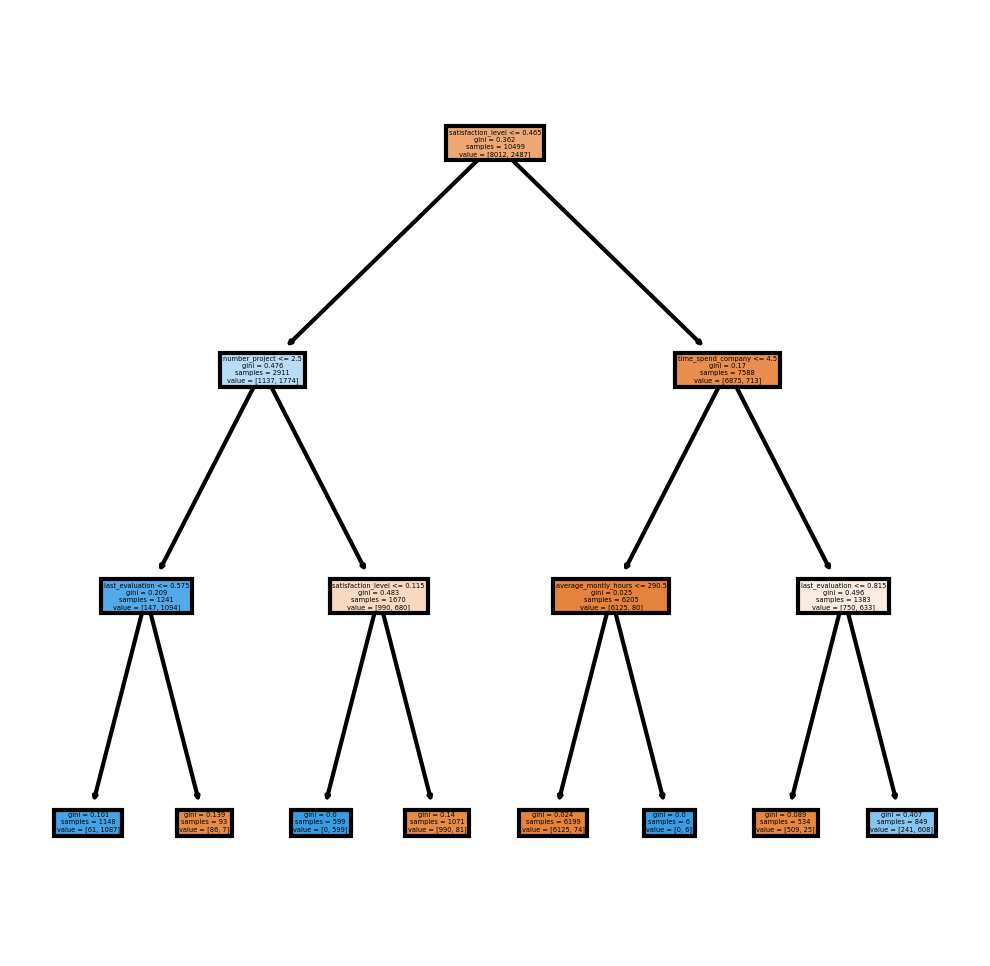

In [65]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = feature_cols, 
           filled = True);

fig.savefig('HR_Tree.png')

#### Interpretation The Naive Bayes Model (95%) is better when compared to LR Model (79%)